# Regressão Linear - Ecommerce


* Imagine que uma empresa de comércio eletrônico queria definir se deve investir mais em vendas pelo aplicativo ou pelo site.


In [1]:
### Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Dados

Empresa de forneceu um arquivo com seus dados:

Arquivo: https://www.kaggle.com/srolka/ecommerce-customers
- Informações pessoais do cliente:
    - **Nome**
    - **Email**
    - **Avatar**
- Informações sobre a interação do cliente com a loja 
    - **Avg. Session Length**: Tempo médio das sessões de consultoria de estilo na loja.
    - **Time on App**: Tempo médio gasto no app em minutos.
    - **Time on Website**: Tempo médio gasto no site em minutos.
    - **Lenght of Membership**: Há quantos anos o cliente é membro.
    - **Yearly Amount Spent**: Valor gasto anualmente

In [2]:
## Leitura dos dados
clientes = pd.read_csv('Ecommerce Customers.csv')

In [7]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Análise exploratória de dados

In [9]:
# para instalar o pandas-profiling
#!pip install -U pandas-profiling

In [10]:
from pandas_profiling import ProfileReport

In [11]:
relatorio = ProfileReport(clientes, title='Relatorio Clientes do Ecommerce')
relatorio.to_file('relatorio_ecommerce.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
relatorio

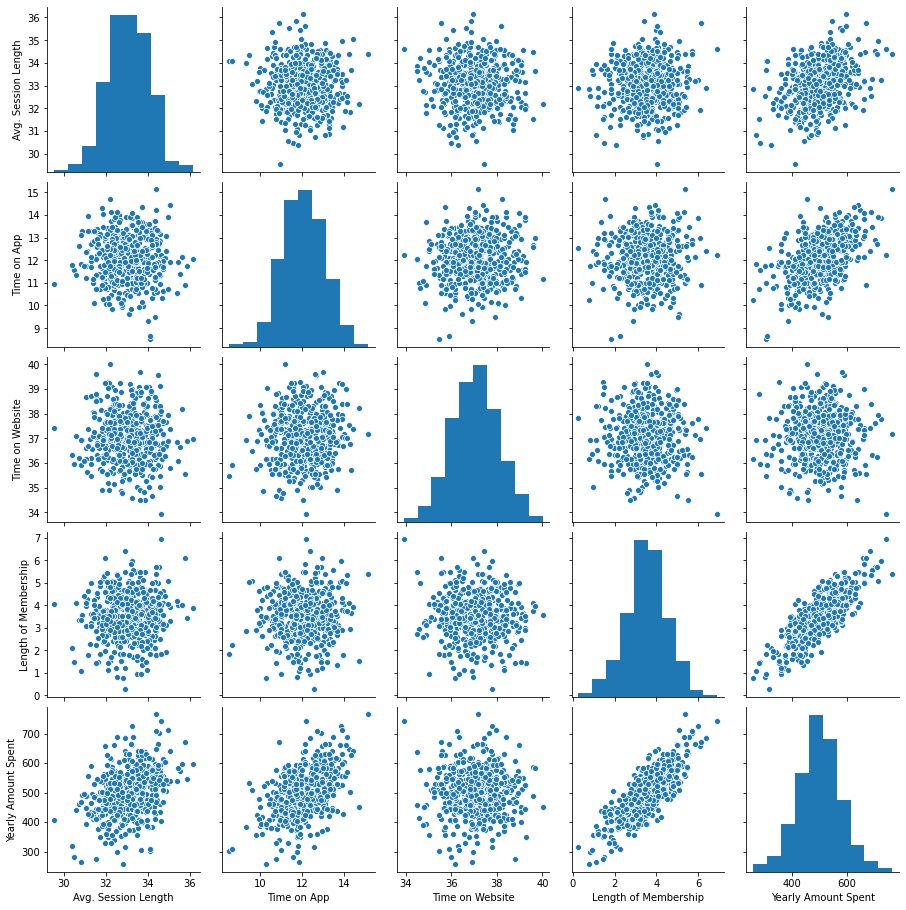

In [23]:
%matplotlib inline
sns.pairplot(clientes)

### Insights  que podem ser  observados no pandas profiling e no pairplot

- Pessoas que passam necessariamente mais tempo no site **não gastam mais**.
- Pessoas que **gastam mais tempo no app** tem uma tendência para **gastar mais**.
- Pessoas que são clientes a algum tempo **NÃO gastam mais**.
- Pessoas que tem **maior tempo de membro** tem uma tendência a gastar mais.

In [34]:
plt.style.use('ggplot')

Text(-3, 1.3, 'Tempo no site X Valor gasto anual')

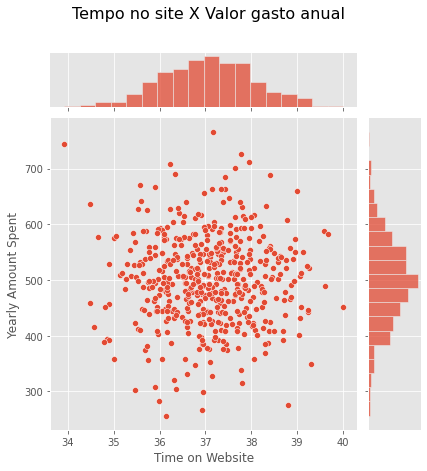

In [35]:
%matplotlib inline

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)
ax = plt.gca()
ax.set_title("Tempo no site X Valor gasto anual",y=1.3,x=-3,fontsize="16")


Text(-3, 1.3, 'Tempo no app X Valor gasto anual')

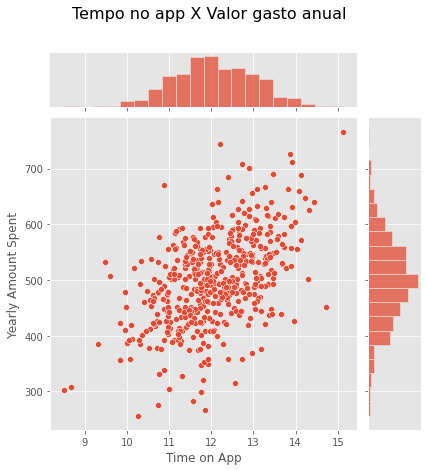

In [36]:
%matplotlib inline
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)
ax = plt.gca()
ax.set_title("Tempo no app X Valor gasto anual",y=1.3,x=-3,fontsize="16")

Text(0.5, 1.4, 'Tempo no app X Duração de associação do cliente')

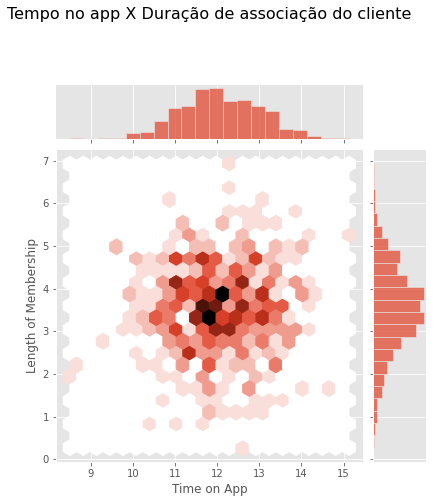

In [45]:
%matplotlib inline

sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')
ax = plt.gca()
ax.set_title("Tempo no app X Duração de associação do cliente",y=1.4,fontsize="16")

### Modelos lineares:


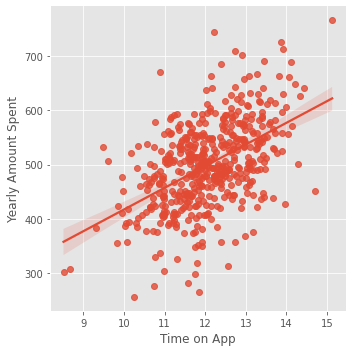

In [46]:
%matplotlib inline
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

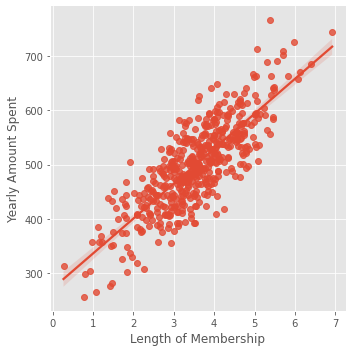

In [47]:
%matplotlib inline
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

## Criação de um Modelo com todas as variáveis

In [48]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [49]:
y = clientes['Yearly Amount Spent']

In [50]:
X = clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

### Dividir meu conjunto em treino e teste usando scikit-learn

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [70]:
#Criar um modelo de regressão linear usando sklearn
lm = LinearRegression()

In [71]:
# Utilizar o método fit() para treinamendo do meu modelo
lm.fit(X_train, y_train)

LinearRegression()

In [72]:
# Apresentando os coeficientes para cada variável do meu X
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [73]:
# Para validar o modelo no conjunto de teste, você precisa utilizar o método predict()
ỹ = lm.predict(X_test)

**Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.**

Text(0, 0.5, 'ỹ predito')

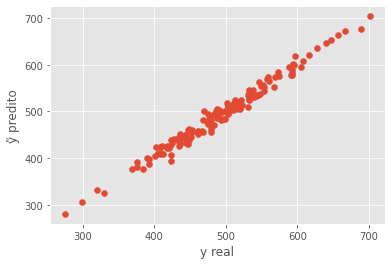

In [74]:
plt.scatter(y_test, ỹ)
plt.xlabel('y real')
plt.ylabel('ỹ predito')

### Avaliando o Modelo

/home/diego/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


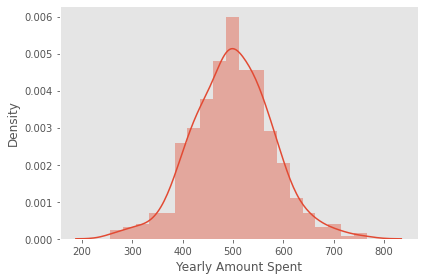

In [75]:
%matplotlib inline
sns.distplot(clientes["Yearly Amount Spent"])
plt.grid()
plt.tight_layout()

In [76]:
from sklearn import metrics

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, ỹ))
print('MSE:', metrics.mean_squared_error(y_test, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ỹ)))
print('R:', metrics.r2_score(y_test,ỹ))

MAE: 8.426091641432063
MSE: 103.9155413650328
RMSE: 10.193897260863128
R: 0.9808757641125856


In [78]:
def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r

In [79]:
print('R-adjust:', adjusted_R(y_test, ỹ, X_train.shape[1]))

R-adjust: 0.980348198984657


## Conclusões


In [83]:
absolute_error = y_test-ỹ

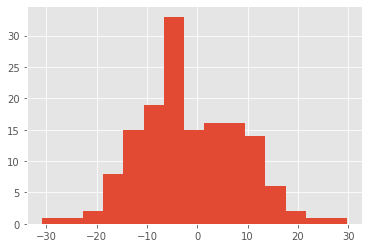

In [88]:
plt.hist(absolute_error, bins=15)
plt.show()

In [39]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


- A cada aumento em uma unidade no tempo médio das sessões de consultoria com o estilista, temos um aumento de 25.98 dólares gasto no ano;
- A cada minuto gasto em média no aplicativo, aumentamos a receita anual em 38.59 dólares;
- O tempo no site reflete muito pouco na receita anual
- A empresa ganha mais quando fideliza seu cliente, quanto mais tempo em unidade de fidelização maior a receita anual em 61.67 dólares


##### OBS: O investimento no App é mais rentável que no Website (segundo o modelo de regressão proposto)